## Plot generator 

Generating plots for searching patterns

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pylab
from collections import Counter

FILE = "learning_vectors/v04/version04-shotstransfermarkt.csv"
N = 25


In [2]:
# Load CSV file with given name
def loadCSVFile(filename):
    data = []
    with open(filename, 'rb') as csvfile:
        reader = csv.DictReader(csvfile, delimiter=',', quotechar='|')
        headers = reader.fieldnames
        for row in reader:
            data.append(row)
    return data, headers


In [3]:
def showPlotWL(w, d, l, title):
    ind = np.arange(N)  # the x locations for the groups
    width = 0.25  # the width of the bars: can also be len(x) sequence

    p1 = plt.bar(ind - width, w, width)
    p2 = plt.bar(ind, d, width)
    p3 = plt.bar(ind + width, l, width)

    plt.ylabel('')
    plt.title(title)
    plt.yticks(np.arange(0, 1500, 100))
    plt.legend((p1[0], p2[0], p3[0]), ('wins', 'draws', 'looses'))

    plt.show()


In [4]:
def showPlotWL2(w, d, l, title):
    ind = np.arange(N)  # the x locations for the groups
    width = 0.25  # the width of the bars: can also be len(x) sequence

    fig = plt.figure(figsize=(16, 10), dpi=80)
    all_in_one = fig.add_subplot(2, 2, 1)

    p1 = all_in_one.bar(ind - width, w, width)
    p2 = all_in_one.bar(ind, d, width)
    p3 = all_in_one.bar(ind + width, l, width)

    plt.title(title)
    plt.yticks(np.arange(0, 1400, 100))
    plt.legend((p1[0], p2[0], p3[0]), ('wins', 'draws', 'looses'))

    draws = fig.add_subplot(2, 2, 2)
    plt.title('draws')
    plt.yticks(np.arange(0, 1400, 100))

    wins = fig.add_subplot(2, 2, 3)
    plt.title('wins')
    plt.yticks(np.arange(0, 1400, 100))

    looses = fig.add_subplot(2, 2, 4)
    plt.title('looses')
    plt.yticks(np.arange(0, 1400, 100))

    wins.bar(ind, w, width * 3)
    draws.bar(ind, d, width * 3)
    looses.bar(ind, l, width * 3)

    pylab.savefig('plots/' + title + '.png')
    plt.show()


In [5]:
def getPlotForProvided(home_val, away_val, title):
    data, headers = loadCSVFile(FILE)

    # 0 - h_win, 1 - drow, 2 - a_win
    # 0 - h_mean into wins, a_mean into looses

    wins = []
    drows = []
    looses = []

    for i in range(len(data)):

        if data[i]["Result"] == '0':
            wins.append([int(data[i]["Result"]), int(float(data[i][home_val]))])
            looses.append([int(data[i]["Result"]), int(float(data[i][away_val]))])
        elif data[i]["Result"] == '1':
            drows.append([int(data[i]["Result"]), int(float(data[i][home_val]))])
            drows.append([int(data[i]["Result"]), int(float(data[i][away_val]))])
        elif data[i]["Result"] == '2':
            looses.append([int(data[i]["Result"]), int(float(data[i][home_val]))])
            wins.append([int(data[i]["Result"]), int(float(data[i][away_val]))])

    wc = Counter([row[1] for row in wins])
    lc = Counter([row[1] for row in looses])
    dc = Counter([row[1] for row in drows])

    w = []
    l = []
    d = []
    for i in range(N):
        w.append(wc[i])
        l.append(lc[i])
        d.append(dc[i])

    showPlotWL2(w, d, l, title)


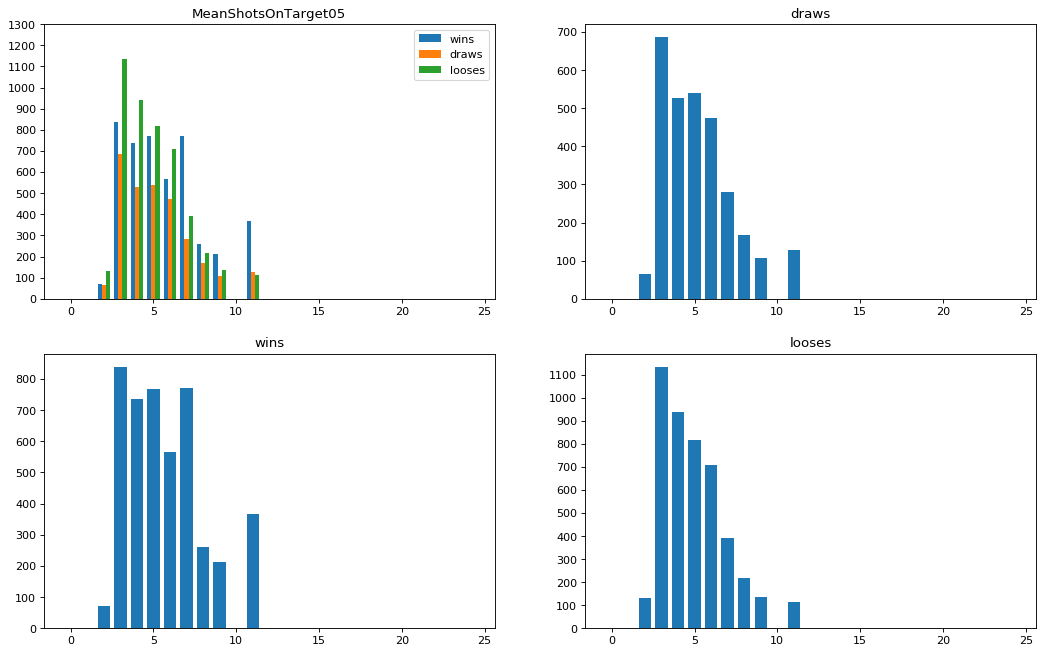

In [6]:
getPlotForProvided("H_Better_MeanShotsOnTarget05",
                   "A_Better_MeanShotsOnTarget05",
                   "MeanShotsOnTarget05")


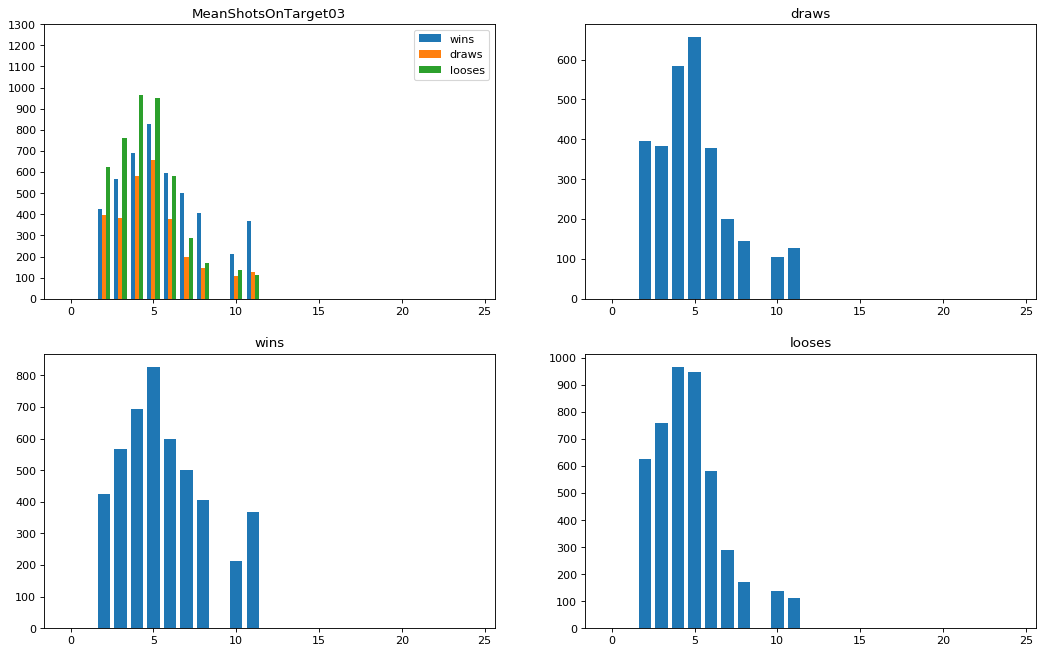

In [7]:
getPlotForProvided("H_MeanShotsOnTarget03",
                   "A_MeanShotsOnTarget03",
                   "MeanShotsOnTarget03")


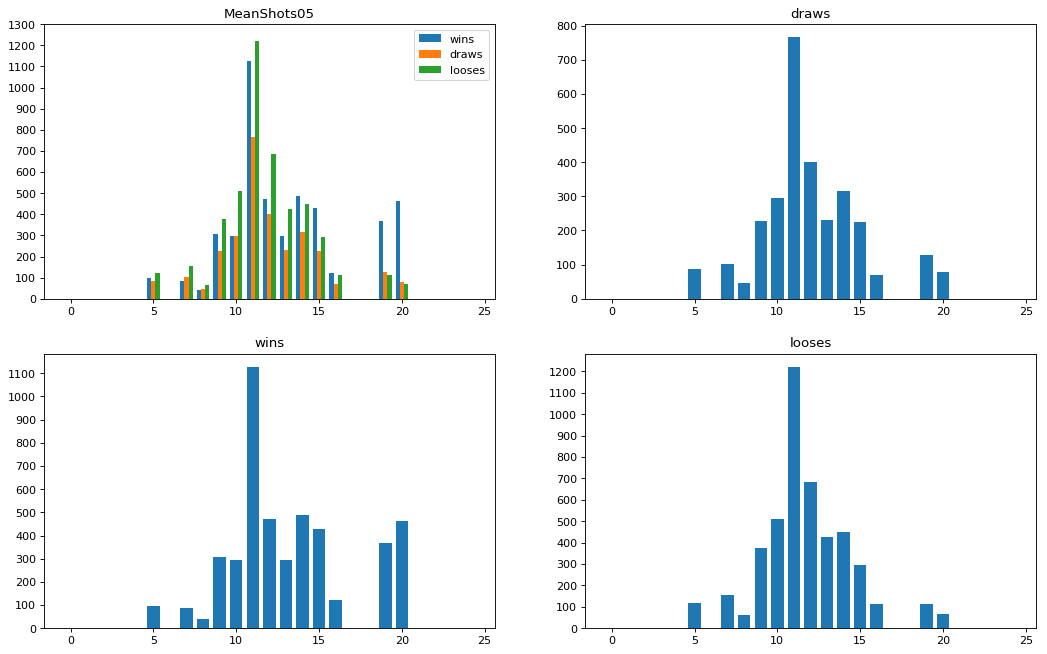

In [8]:
getPlotForProvided("H_MeanShots05",
                   "A_MeanShots05",
                   "MeanShots05")


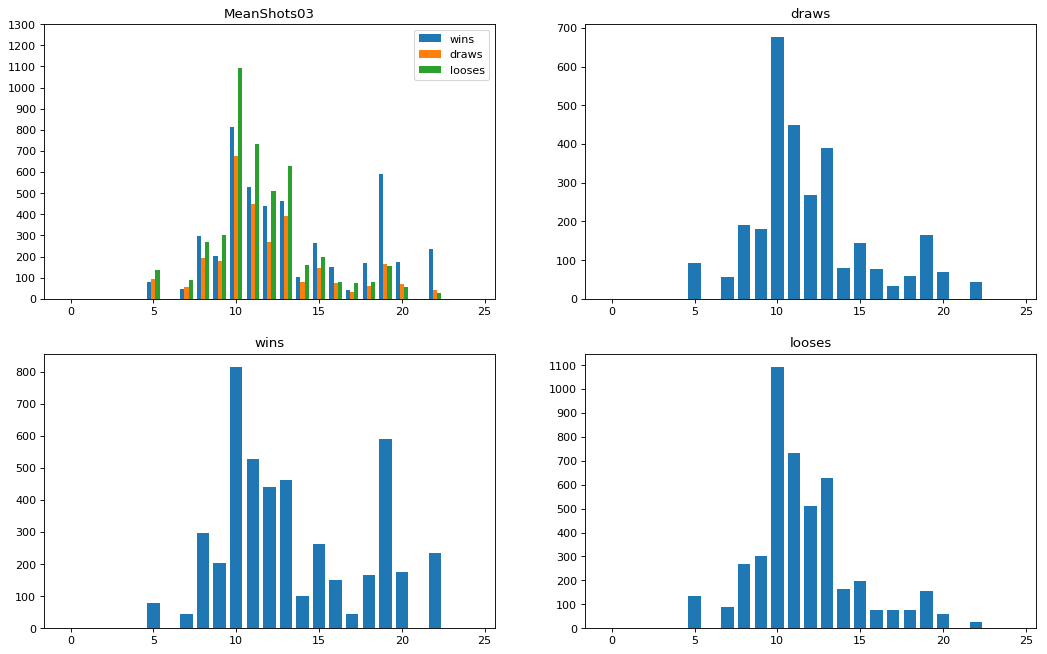

In [9]:
getPlotForProvided("H_MeanShots03",
                   "A_MeanShots03",
                   "MeanShots03")


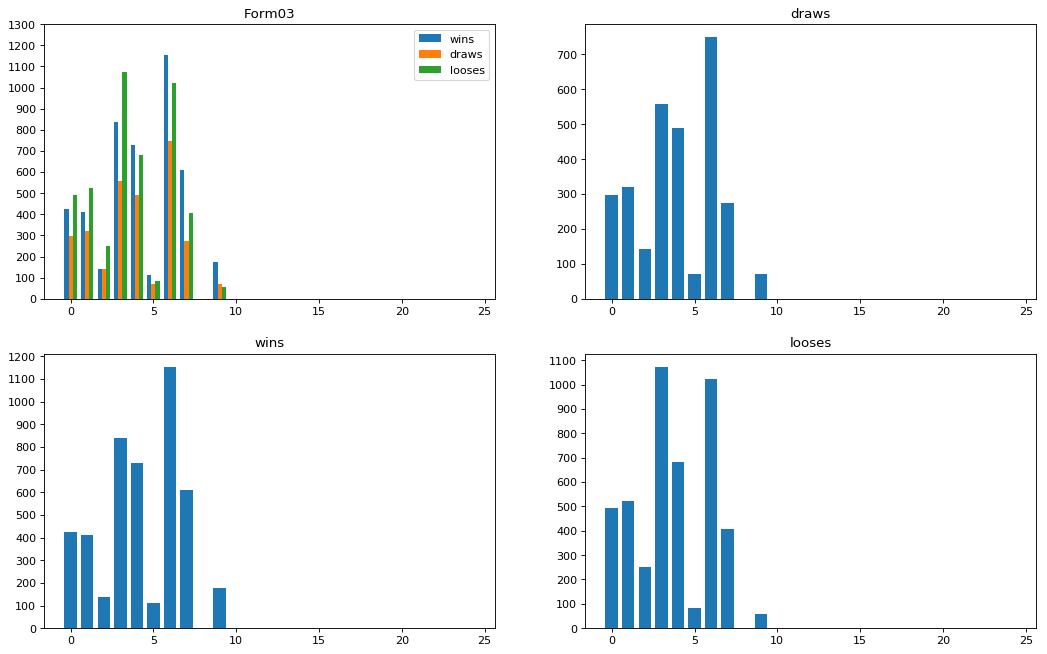

In [10]:
getPlotForProvided("H_Form03",
                   "A_Form03",
                   "Form03")


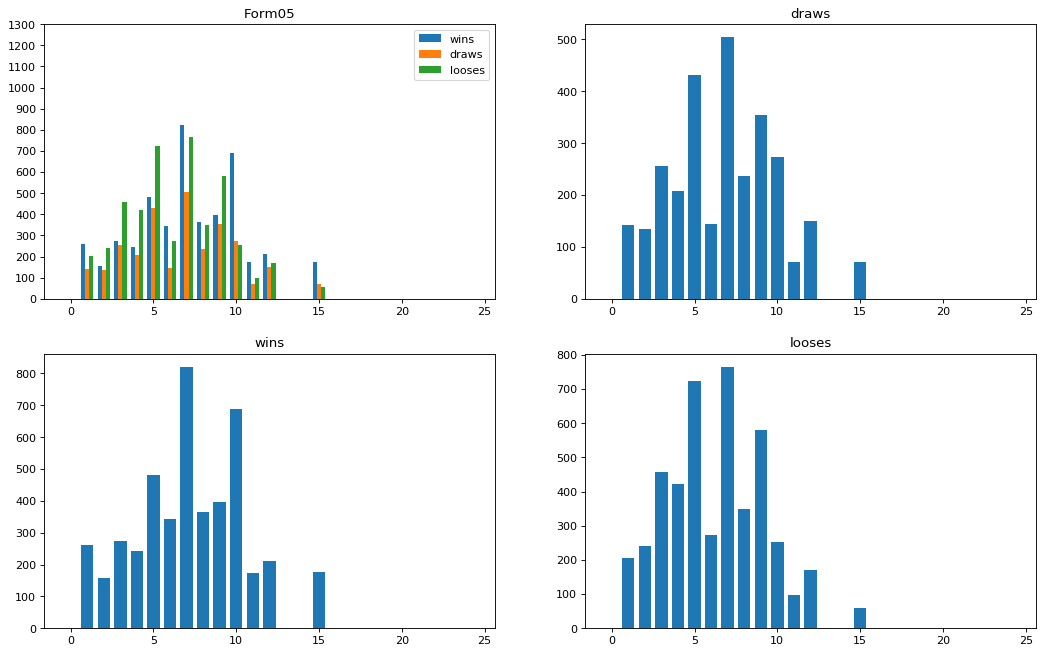

In [11]:
getPlotForProvided("H_Form05",
                   "A_Form05",
                   "Form05")
